In [1]:
import glob
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from SALib.analyze import fast

In [2]:
problem = {
            'num_vars': 12,
            'names': ['c', 'expn_sigma_f', 'expn_m', 'expn_sigma_e', 'r', 'mu_L',
                       'sigma_L', 'q', 'h_max', 'd', 'mate_pickiness', 'dummy'],
            'bounds': [
                [400, 600],             # Range for 'c'
                [-2, 0.5],              # Range for 'expn_sigma_f'
                [-3, -1],               # Range for 'expn_m'
                [-3, -1],               # Range for 'expn_sigma_e'
                [0.8*4.08, 1.2*4.08],   # Range for 'r'
                [0.8*6.8, 1.2*6.8],     # Range for 'mu_L'
                [0.8*2.2, 1.2*2.2],     # Range for 'sigma_L'
                [0.4, 0.6],             # Range for 'q'
                [0.01, 0.5],            # Range for 'h_max'
                [0.8*0.68, 1.2*0.68],   # Range for 'd'
                [0, 0.4],               # Range for mate pickiness
                [0, 1]                  # Range for 'dummy'
            ]
        }

In [3]:
with open("data/efast/master_df_parsed_150.pickle", "rb") as f:
    df = pickle.load(f)

df['speciation_bool'] = df['speciation_ybp'].notna()

In [4]:
constant_y = df[df['food_scheme'] == 'constant'].groupby('param_set')['speciation_bool'].mean().values
constant_var_sens = fast.analyze(problem, Y = constant_y)

incr_y = df[df['food_scheme'] == 'increasing'].groupby('param_set')['speciation_bool'].mean().values
incr_var_sens = fast.analyze(problem, Y = incr_y)

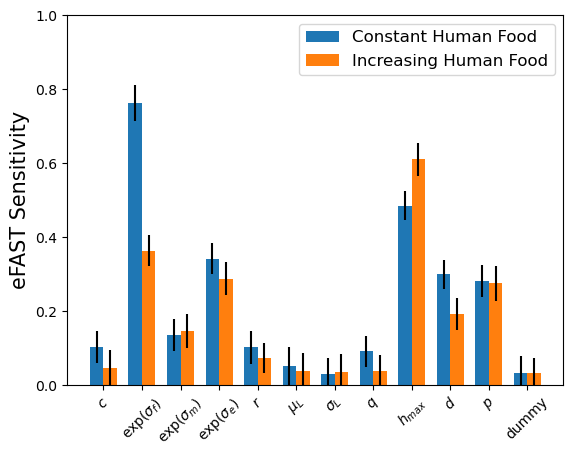

In [5]:
# Make the plot! 
ind = np.arange(len(problem['names']))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, constant_var_sens['ST'], width, yerr = constant_var_sens['ST_conf'],
                label='Constant Human Food')
rects2 = ax.bar(ind + width/2, incr_var_sens['ST'], width, yerr = incr_var_sens['ST_conf'],
                label='Increasing Human Food')

ax.set_ylabel('eFAST Sensitivity', fontsize=15)
ax.set_xticks(ind)
ax.set_xticklabels([r'$c$',
 r'$\exp(\sigma_f)$',
 r'$\exp(\sigma_m)$',
 r'$\exp(\sigma_e)$',
 r'$r$',
 r'$\mu_L$',
 r'$\sigma_L$',
 r'$q$',
 r'$h_{max}$',
 r'$d$',
 r'$p$',
 'dummy'], rotation = 45)
ax.legend(fontsize=12)
ax.set_ylim(0, 1)
plt.savefig('figures/sa/efast_speciation_perc_150.pdf', bbox_inches='tight')